# Lineární Regrese

Úloha zaměřená na implementaci lineární regrese pomocí metody LSE.

Data reprezentují výsledky zkoušky, konkrétně bodový zisk v závislosti na době studia.

Import knihoven:

In [1]:
import numpy as np
import usu

Načtení dat:

In [2]:
npzfile = np.load('data/data_02.npz')
npzfile.files


['x0', 'x1']

Přiřazení dat do nezávislé a závislé proměnné:

In [3]:
x = npzfile['x0']
y = npzfile['x1']
x.shape, y.shape # 100 radku a 1 sloupec


((100, 1), (100, 1))

Vykreslení dat:

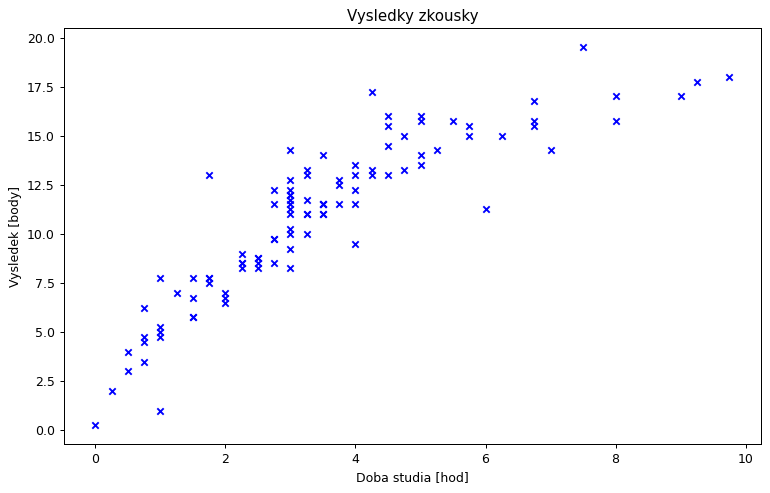

In [4]:
usu.draw(x, y, "Vysledky zkousky", "Doba studia [hod]", "Vysledek [body]")

## LSE (Least-Squares Estimation)


### Odhad parametrů $\theta$ :

$$ \theta = (\tilde{X^T} \tilde{X})^{-1} \tilde{X^T} y $$  
kde $\tilde{X}$ je rozšířená matice dat $X$ (je rozšířená o jeden sloupec s hodnotami 1)

#### Příklad matice $\tilde{X}$ pro lineární regresi:

$$
    X = 
        \begin{bmatrix}
        1 \\
        2 \\
        3\\
        \end{bmatrix} 
    \implies
        \tilde{X} = 
        \begin{bmatrix}
        1 & 1 \\
        1 & 2 \\
        1 & 3\\
        \end{bmatrix} 
$$


#### Příklad matice  $\tilde{X}$ pro polynomiální regresi:

* Každá vyšší mocnina $X$ je v případě PR považována za **další nezávislou proměnnou**.

$$
    X = 
        \begin{bmatrix}
        1 & 1 \\
        2 & 4 \\
        3 & 9 \\
        \end{bmatrix} 
    \implies
    \tilde{X} = 
        \begin{bmatrix}
        1 & 1 & 1 \\
        1 & 2 & 4 \\
        1 & 3 & 9 \\
        \end{bmatrix} 
$$


### Odhad  $\theta$ se zapojením regularizace:
$$ \theta = (\tilde{X^T} \tilde{X} + \lambda I)^{-1} \tilde{X^T} y $$  
kde $\lambda$ je koeficient regularizace (hyperparametr), $I$ je jednotková matice o rozměrech $n \times n$ ($n$ je počet sloupců matice $\tilde{X}$)

Funkce pro odhad parametrů theta:

In [5]:
def computeThetaLSE(x, y, order=1, lmbd=0):
    """
    x - vektor vstupnich hodnot (doba studia)
    y - vektor vystupnich  hodnot (zisk bodu)
    order - rad polynomu
    lmbd - regularizacni parametr lambda
    
    """
    expanded_x = np.ones((x.shape[0], 1))
    for deg in range(1, order + 1):
        expanded_x = np.c_[expanded_x, x**deg]
        
    expanded_x_transposed = np.transpose(expanded_x)
    eye=np.eye(expanded_x.shape[1], dtype=int)
    #print(lmbd*eye)

    theta = np.dot(np.linalg.inv(np.dot(expanded_x_transposed, expanded_x)+(lmbd*eye)),np.dot(expanded_x_transposed,y))

    return theta


Linearní regrese bez regularizace (polynom 1. řádu):

In [6]:
theta = computeThetaLSE(x, y)
print(theta)

[[4.84319118]
 [1.74511077]]


Vykreslení výsledků regrese:

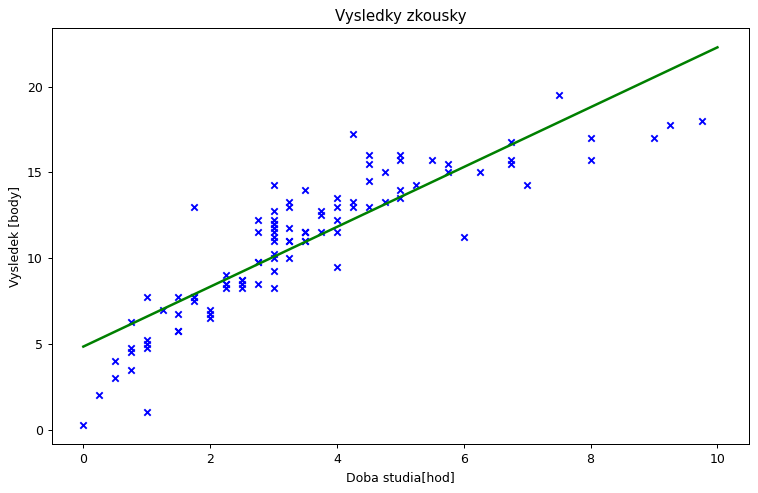

In [7]:
#vstupni paremetry do funkce usu.dra (theta, x a y) musi byt typu np.array nikoli matrix

usu.draw(x, y, "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta)

Určete předpokládaný zisk bodů v případě přípravy v délce 4 hodin:

x : 4.000, y : 11.824


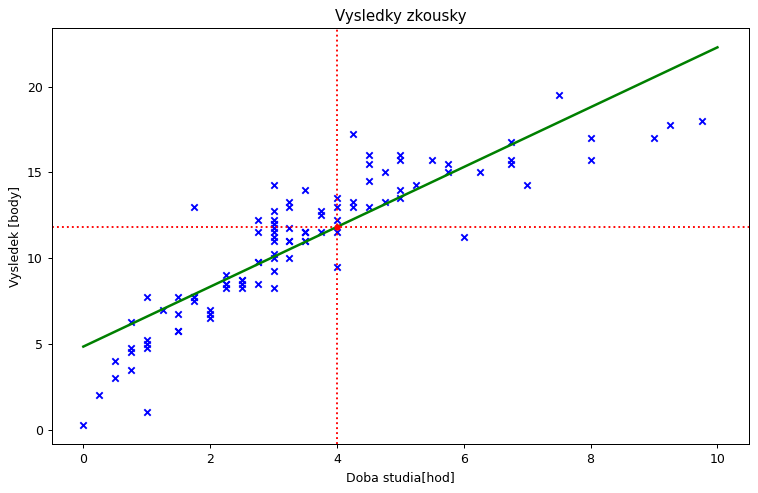

In [8]:
#################################################################
# ZDE DOPLNIT

valueX = 4
valueY = (theta[1]*valueX)+theta[0]
usu.draw(x, y, "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta, valueX, valueY)
#################################################################


Určete předpokládanou dobu studia v případě zisku 12 bodů:

x : 4.101, y : 12.000


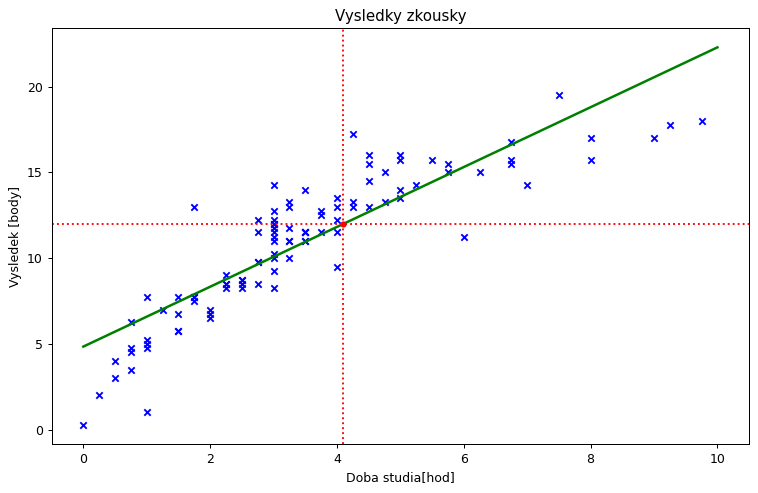

In [9]:
#################################################################
# ZDE DOPLNIT

valueY = 12
valueX = (valueY-theta[0])/theta[1]

#################################################################

usu.draw(x, y, "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta, valueX, valueY)


### Polynomiální regrese

Určete předpokládaný zisk bodů v případě přípravy v délce 4 hodin, řádu polynomu 2 a 𝜆 1:

[[ 1.34982594]
 [ 4.1438925 ]
 [-0.36147152]
 [ 0.01084964]]
x : 4.000, y : 12.836


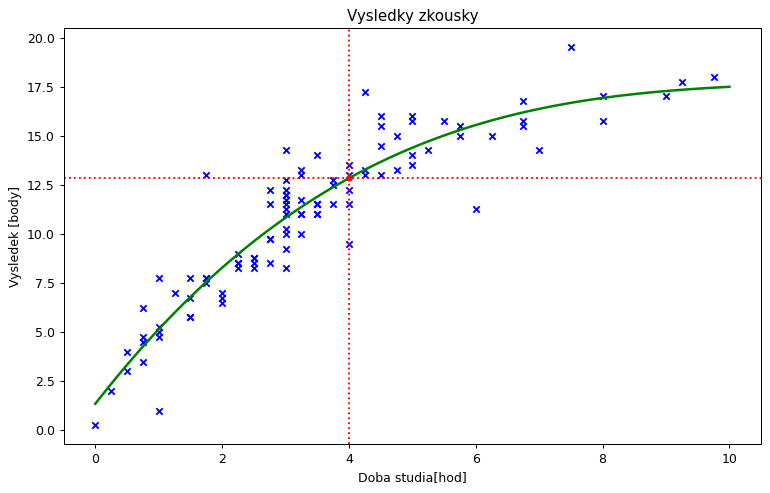

In [10]:
order = 3
lmbd = 1
theta = computeThetaLSE(x, y, order, lmbd)
print(theta)

#################################################################
# ZDE DOPLNIT

valueX = 4
valueY = theta[3]*valueX**3+theta[2]*valueX**2+theta[1]*valueX+theta[0]
# Nejvhodnejsi rad polynomu a proc: rad 2 začne ke konci klesat, rad 3 nezacne klesat, rad 4 zace strme rust

#################################################################

usu.draw(x, y, "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta, valueX, valueY)


### Exponenciální regrese

Reší se jako lineární regrese pro data s hodnotami $[x,\log{(y)}]$

In [11]:
npzfile = np.load('data/data_02_exp.npz')
npzfile.files

['x0', 'x1']

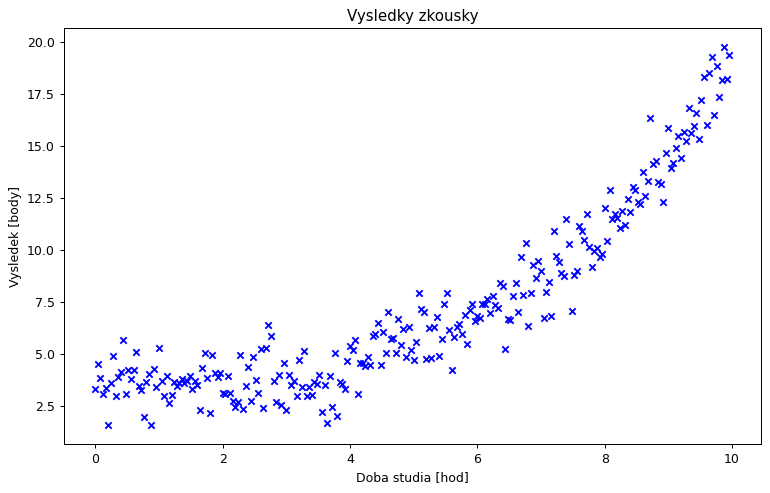

In [12]:
x_exp = npzfile['x0']
y_exp = npzfile['x1']
usu.draw(x_exp, y_exp, "Vysledky zkousky", "Doba studia [hod]", "Vysledek [body]")


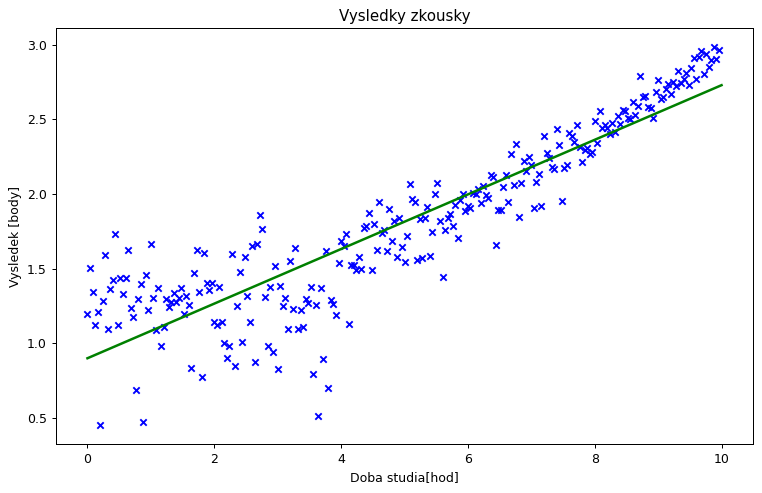

In [13]:
#################################################################
# ZDE DOPLNIT
order=1
lmbd=0
theta = computeThetaLSE(x_exp, np.log(y_exp), order, lmbd)
usu.draw(x_exp, np.log(y_exp), "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta)

#################################################################


Určete předpokládaný zisk bodů v případě přípravy v délce 4 hodin:

[[0.90092166]
 [0.18277594]]
x : 9.000, y : 2.546


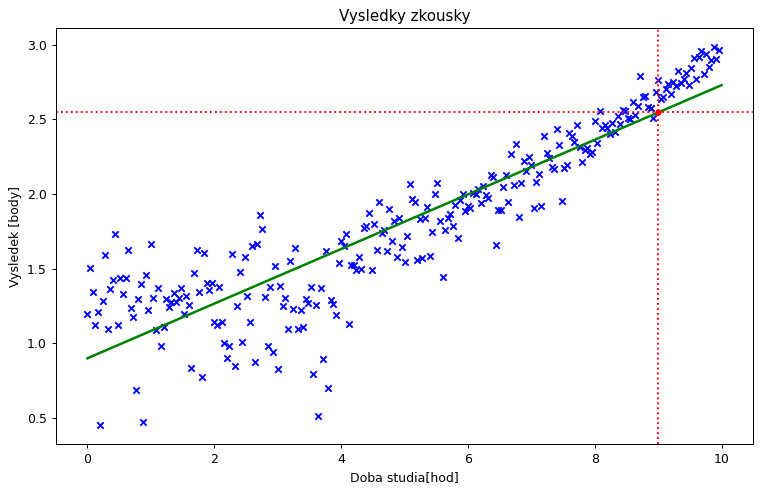

y =  [12.75476781]


In [15]:
#################################################################
# ZDE DOPLNIT
print(theta)
valueX = 9
valueY = (theta[1]*valueX)+theta[0]
realY = np.exp(valueY)
usu.draw(x_exp, np.log(y_exp), "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta, valueX, valueY)
print("y = ", realY)
#################################################################
